In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from sklearn.linear_model import LinearRegression

In [203]:
counts = pd.read_csv('../data/Fremont_Bridge_Bicycle_Counter_20240507.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('../data/3682502.csv', index_col='DATE', parse_dates=True)
counts.columns = ['Total', 'West', 'East']
daily = counts.resample('d').sum()
daily = daily[['Total']]

C:\Users\lakan\AppData\Local\Temp\ipykernel_8876\131539700.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  counts = pd.read_csv('../data/Fremont_Bridge_Bicycle_Counter_20240507.csv', index_col='Date', parse_dates=True)


In [204]:
daily

,Total
Date,
2012-10-02,1938.0
2012-10-03,3521.0
2012-10-04,3475.0
2012-10-05,3148.0
2012-10-06,2006.0
...,...
2024-04-26,2384.0
2024-04-27,1199.0
2024-04-28,1351.0


In [205]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)


In [206]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2024')

hd = pd.Series(1.0, index=holidays,name='holiday')
hd = pd.DataFrame(hd)
hd

,holiday
2012-01-02,1.0
2012-01-16,1.0
2012-02-20,1.0
2012-05-28,1.0
2012-07-04,1.0
...,...
2023-10-09,1.0
2023-11-10,1.0
2023-11-23,1.0
2023-12-25,1.0


In [207]:
daily = daily.join(hd)

In [208]:
daily['holiday'].fillna(0, inplace=True)

In [209]:
daily.loc[daily.holiday == True]

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-08,3537.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2012-11-12,1631.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2012-11-22,554.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2012-12-25,98.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2013-01-01,678.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
2023-10-09,2234.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2023-11-10,1659.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2023-11-23,718.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [210]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    
    days = (pd.to_datetime(date) - pd.to_datetime('2000-12-21')).days
    m = (1. - np.tan(np.radians(latitude)) * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

<Axes: xlabel='Date'>

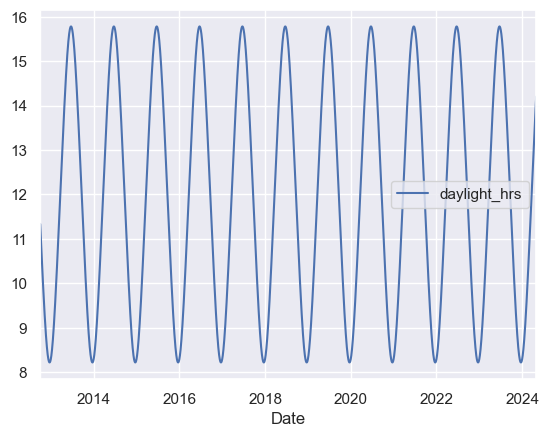

In [211]:
daily['daylight_hrs'] =list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()


In [212]:
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)
weather

,STATION,NAME,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,...,WT06,WT08,WT09,WT13,WT14,WT16,WT18,WT22,Temp (C),dry day
DATE,,,,,,,,,,,,,,,,,,,,,
2012-10-10,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",3.13,NaN,0.000000,0.0,0.0,NaN,5.4,4.7,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,5.05,1
2012-10-11,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2.91,NaN,0.000000,0.0,0.0,NaN,5.7,4.5,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,5.10,1
2012-10-12,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.29,NaN,0.000315,0.0,0.0,NaN,5.7,4.8,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,5.25,0
2012-10-13,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",8.72,NaN,0.000748,0.0,0.0,NaN,6.0,5.4,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,5.70,0
2012-10-14,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",7.61,NaN,0.002559,0.0,0.0,NaN,6.4,5.6,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,6.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",6.93,NaN,0.000000,0.0,0.0,48.0,5.8,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.90,1
2024-05-02,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",7.83,NaN,0.000000,0.0,0.0,52.0,6.6,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.40,1
2024-05-03,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",6.26,NaN,0.000000,NaN,0.0,56.0,6.6,4.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.60,1


In [213]:
daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])


In [214]:
daily = daily.dropna()
daily['annual'] = (daily.index - daily.index[0]).days / 365

In [225]:
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday', 'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
Xtrain = daily[column_names][:4000]
ytrain = daily['Total'][:4000]
Xtest = daily[column_names][4000:]
ytest = daily['Total'][4000:]
X = daily[column_names]

In [226]:
Xtrain.shape

(4000, 13)

In [227]:
model = LinearRegression(fit_intercept=False)
model.fit(Xtrain, ytrain)
daily['predicted'] = model.predict(X)
ypred = model.predict(Xtest)

<Axes: xlabel='Date'>

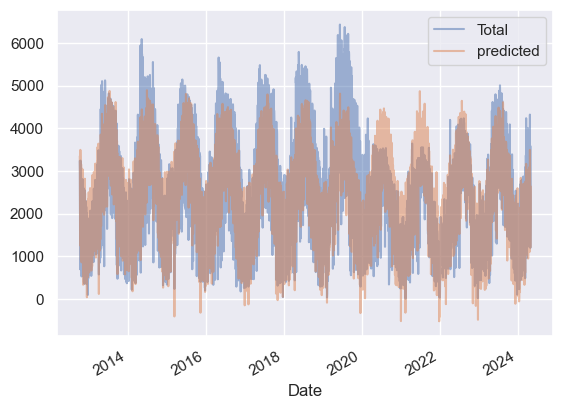

In [219]:
daily[['Total', 'predicted']].plot(alpha=0.5)

In [230]:
ypred[:10]

array([2405.92550949, 2417.62677905, 2569.54591584, 2631.98588783,
       1752.91270114, 1595.87283928, 2123.09600612, 2784.70884185,
       3381.24366093, 3278.22732355])

In [240]:
test = pd.DataFrame(ytest)
idx = test.index

In [243]:
ypred = pd.DataFrame(pd.Series(ypred, index=idx))

In [245]:
test['ypred'] = ypred

In [246]:
test

,Total,ypred
Date,,
2023-09-26,2628.0,2405.925509
2023-09-27,1823.0,2417.626779
2023-09-28,2485.0,2569.545916
2023-09-29,2892.0,2631.985888
2023-09-30,2187.0,1752.912701
...,...,...
2024-04-24,2867.0,3134.381424
2024-04-26,2384.0,2377.292006
2024-04-27,1199.0,1151.844228


<Axes: xlabel='Date'>

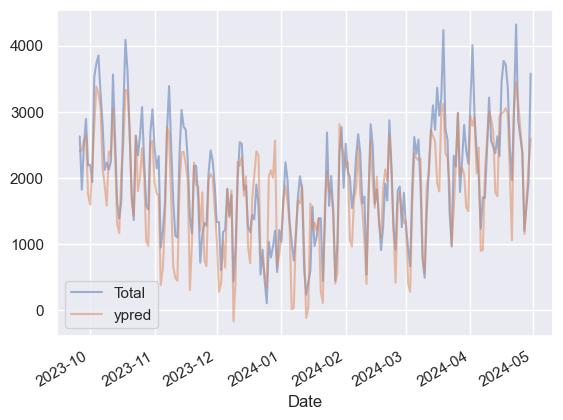

In [248]:
test.plot(alpha=0.5)